# Guía de Sistemas Discretos: Ejercicio 10
## Análisis de Señales y Sistemas Digitales

### Grupo 2
* Francois, Matías
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín
* Maselli, Carlos Javier
* Trozzo, Rafael Nicolás

---------------------------------

![title](ejercicio_10.png)

### Ecuación en diferencias del sistema
La ecuación a diferencias del sistema en este caso se puede encontrar realizando una modificación en el esquema del sistema, sin cambiar sus características, simplemente mostrándolo de la forma más sencilla para solución.

\begin{equation}
    y(n) = x(n) + y(n-1) \cdot 1.3 - 0.42 \cdot y(n-2)
\end{equation}

In [6]:
from numpy import ndarray, int32, cos, pi

def system(x: callable, alpha: float, beta: float) -> callable:
    """
    La función del sistema crea una función evaluable como el resultado de aplicarle el sistema
    a una determinada entrada.
    :param x: Señal de tiempo discreto de entrada, como función evaluable
    :param alpha: Primer parámetro del sistema
    :param beta: Segundo parámetro del sistema
    :return: Devuelve una función evaluable en un conjunto del tiempo discreto
    """
    def output(domain: list) -> float:
        values = []
        for index, n in enumerate(range(-2, domain[-1] + 1)):
            if n < 0:
                value = 0
            else:
                value = x(n) + alpha * values[index - 1] + beta * values[index - 2]
            values.append(value)
        return values[len(values)-len(domain):]
    return output

def causal_cos(f: float, ts: float) -> callable:
    
    def inner_cos(domain: list or int) -> float:
        return cos(2 * pi * f * ts * domain)
    
    return inner_cos

In [7]:
from matplotlib import pyplot
from numpy import arange

pyplot.rcParams["figure.figsize"] = (16,7)

def plot_exercise(input_signal: callable, start: int, stop: int, alpha: int, beta: int, title: str):
    # Cálculo de entrada a salida
    output_signal = system(input_signal, alpha, beta)

    # Gráficos de las señales resultantes
    n_domain = arange(start, stop, 1)

    fig, (ax1, ax2) = pyplot.subplots(1, 2)
    fig.suptitle(title, fontsize=20)
    
    ax1.stem(n_domain, input_signal(n_domain), 'r', markerfmt='r.', label="x(n)", use_line_collection=True)
    ax1.set_title("Señal de entrada $x(n)$")
    ax1.legend()
    ax1.minorticks_on()
    ax1.grid(which='both')

    ax2.stem(n_domain, output_signal(n_domain), 'g', markerfmt='g.', label="y(n)", use_line_collection=True)
    ax2.set_title("Señal de salida $y(n)$")
    ax2.legend()
    ax2.minorticks_on()
    ax2.grid(which='both')

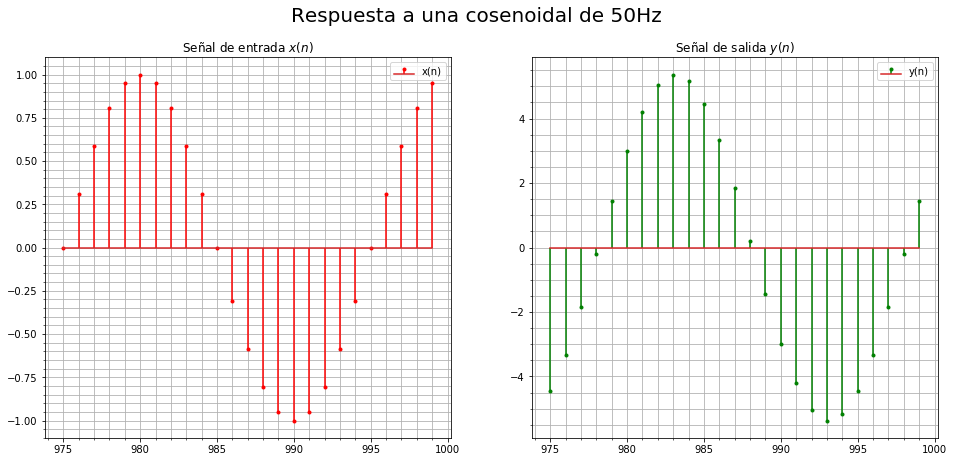

In [14]:
plot_exercise(causal_cos(50, 1e-3), 975, 1000, 1.3, -0.42, "Respuesta a una cosenoidal de 50Hz")

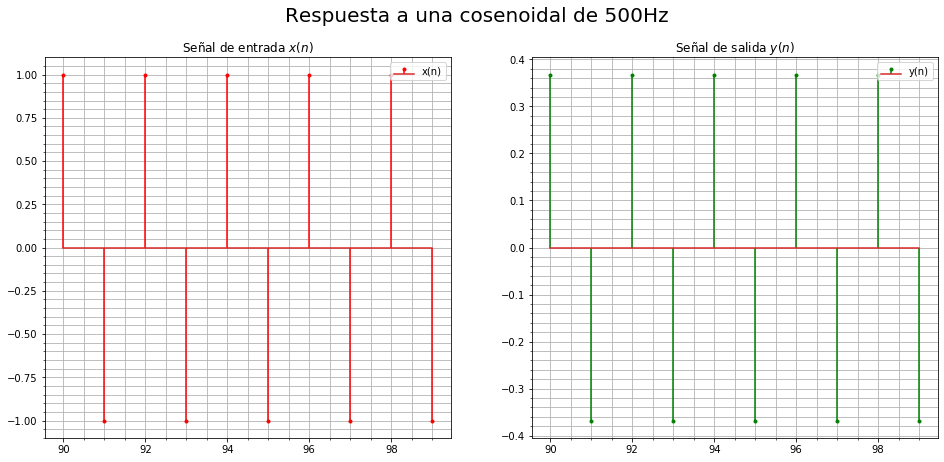

In [19]:
plot_exercise(causal_cos(500, 1e-3), 90, 100, 1.3, -0.42, "Respuesta a una cosenoidal de 500Hz")

### Análisis de resultados
En primer lugar, se me ocurre observar que en ambos casos el sistema logra establecerse en el régimen permanente copiando a la entrada, no obstante en ambos casos el valor de la amplitud cambia con lo cual un podría asumir que esto es parte del efecto de la respuesta en frecuencia y cómo filtra de forma diferente ambas frecuencias. Por otro lado, puede observarse que el proceso de muestreo en un caso cumple con la frecuencia de Nyquist, mientras que en otro lo hace muy al límite de forma tal que sólo podemos apreciar las amplitudes y no la forma de la señal.